In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import missingno
%matplotlib inline

In [2]:
models=[]
acc=[]
precision=[]
recall=[]
f1=[]

In [3]:
train = pd.read_csv('HR_train.csv')

In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
train.describe(include=['O'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [7]:
train.nunique() #employee_id has distinct value for each record which can be removed

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

### Checking Target variable imbalance

In [8]:
(train.groupby('is_promoted')['employee_id'].count()/train['employee_id'].count())*100

is_promoted
0    91.482995
1     8.517005
Name: employee_id, dtype: float64

###### 91% and 9% impbalance ratio in target variable

In [9]:
#sns.heatmap(train.isnull(),yticklabels=True,cbar=False,cmap='viridis')

In [10]:
train.drop('employee_id',axis=1,inplace=True)

## Checking Null value

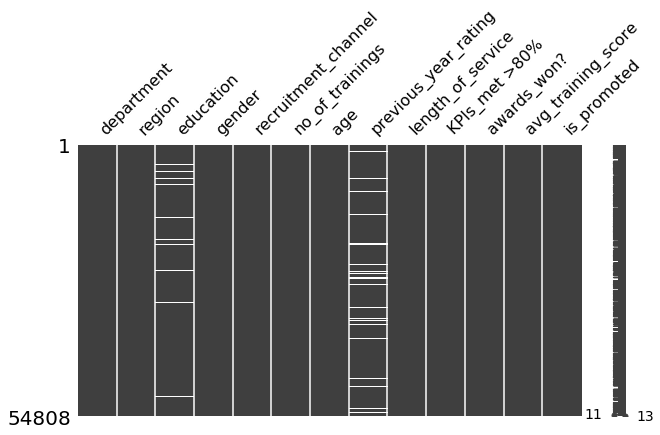

In [11]:
missingno.matrix(train,figsize=(10,5))

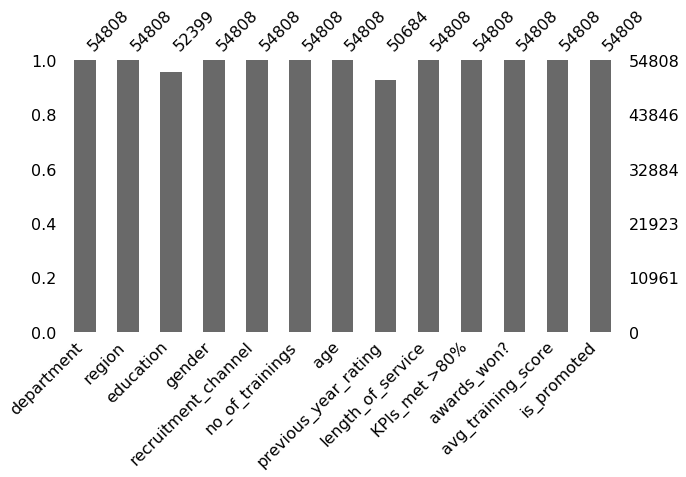

In [12]:
missingno.bar(train,figsize=(10,5))

## Plot distribution of each feature

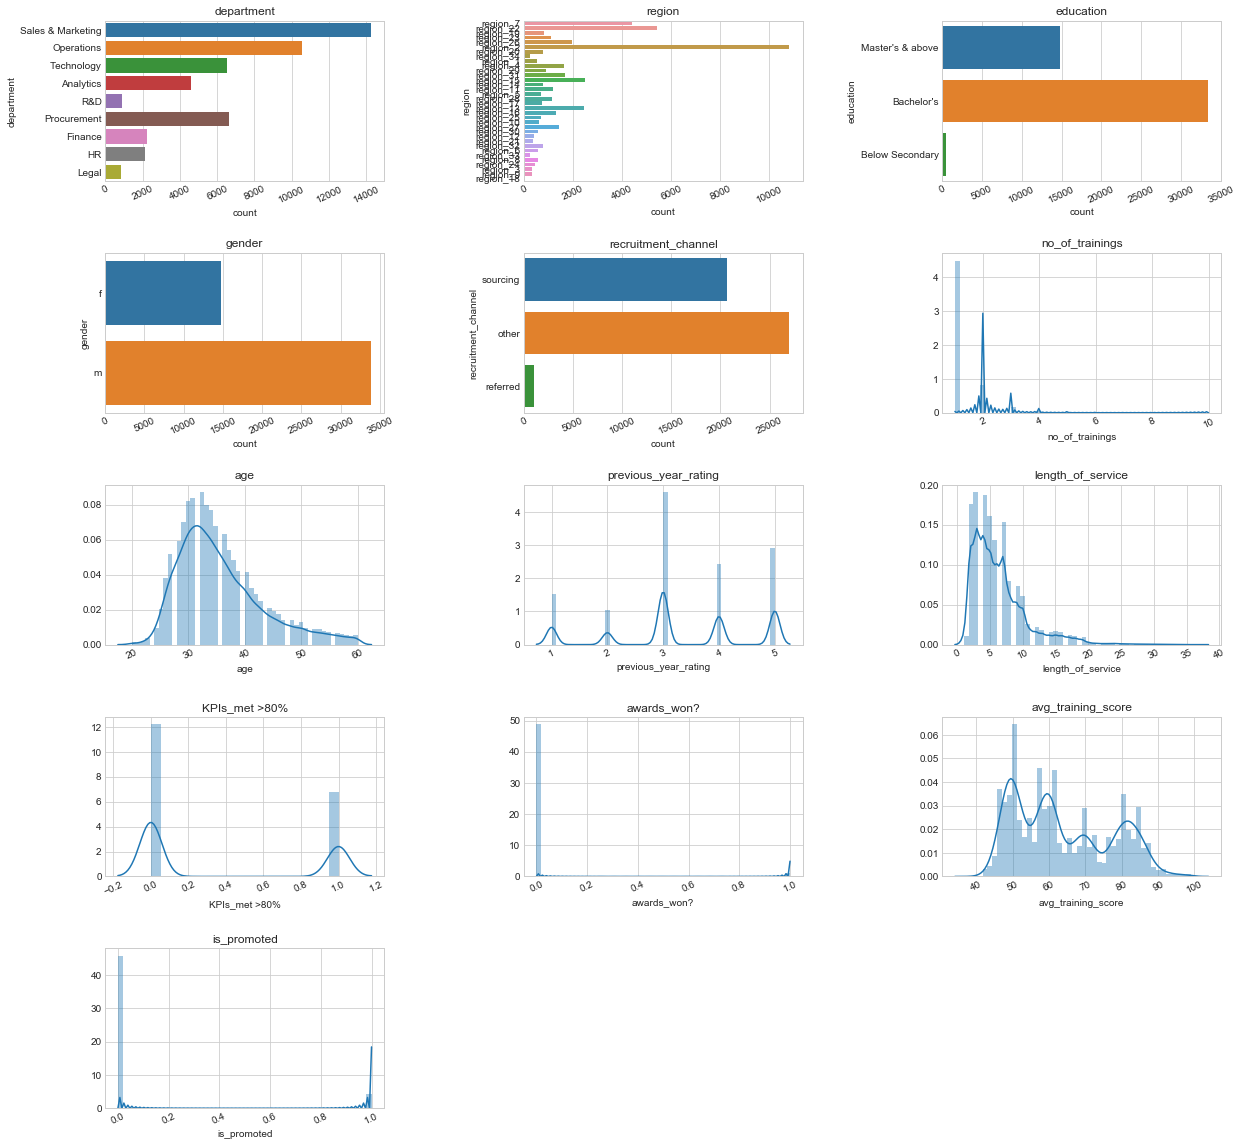

In [13]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(train.dropna(), cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

## Education null imputation

In [14]:
train.groupby('education')['department'].count()

education
Bachelor's          36669
Below Secondary       805
Master's & above    14925
Name: department, dtype: int64

In [15]:
train1=train[train['education'].isnull()]

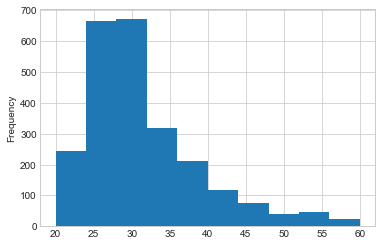

In [16]:
train1['age'].plot.hist()

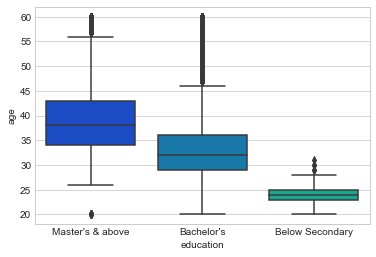

In [17]:
sns.boxplot(x='education',y='age', data=train, palette='winter')
sns.set_style('whitegrid')

In [18]:
train.groupby('education')['age'].median()

education
Bachelor's          32
Below Secondary     24
Master's & above    38
Name: age, dtype: int64

In [19]:
train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'], dtype=object)

In [20]:
def impute_education(cols):
    age =cols[0]
    education = cols[1]
    if pd.isnull(education):
        
        if age>=38:
            return "Master's & above"
        
        elif age>24:
            return "Bachelor's"
        else:
            return "Below Secondary"
    else:
        return education
    

In [21]:
train['education']= train[['age', 'education']].apply(impute_education,axis=1)

In [22]:
train['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [23]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


education
Bachelor's          31
Below Secondary     24
Master's & above    38
Name: age, dtype: int64

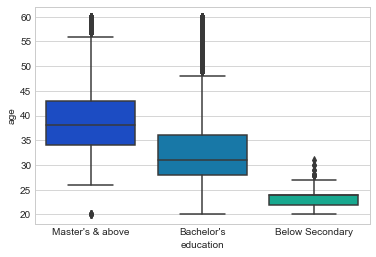

In [24]:
#Distributation has not been changed post imputation 

sns.boxplot(x='education',y='age', data=train, palette='winter')
train.groupby('education')['age'].median()

## previous_year_rating null imputation

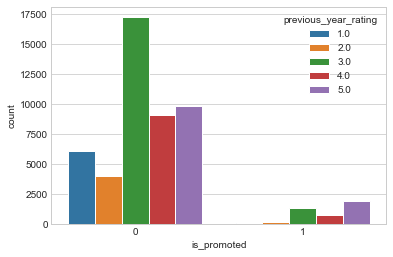

In [25]:
sns.countplot(x='is_promoted',hue='previous_year_rating',data=train)

In [26]:
train.fillna({'previous_year_rating':3}, inplace=True)

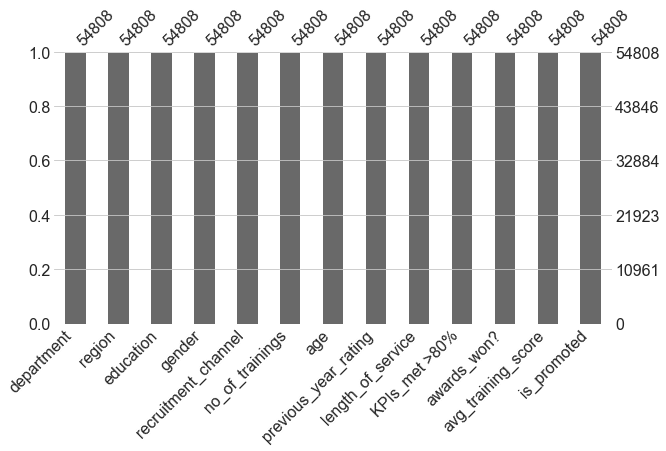

In [27]:
missingno.bar(train,figsize=(10,5))

## Features weightage on target variable

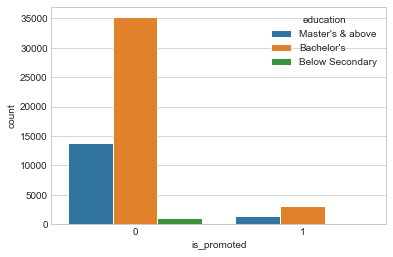

In [28]:
sns.countplot(x='is_promoted', hue='education', data =train)

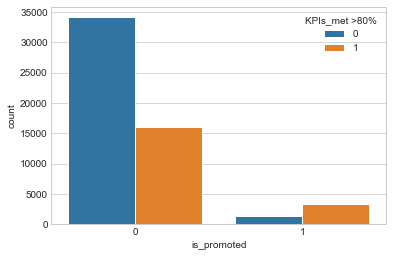

In [29]:
sns.countplot(x='is_promoted',hue='KPIs_met >80%',data=train)

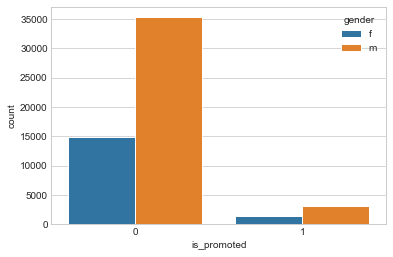

In [30]:
sns.countplot(x='is_promoted',hue='gender',data=train)

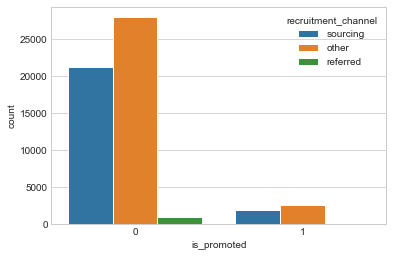

In [31]:
sns.countplot(x='is_promoted',hue='recruitment_channel',data=train)

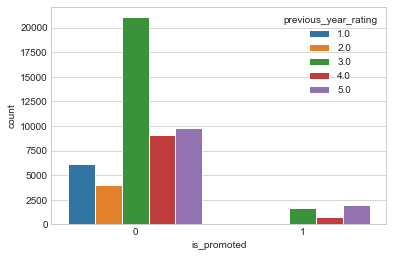

In [32]:
sns.countplot(x='is_promoted',hue='previous_year_rating',data=train)

## Feature Encoding

In [33]:
train['region'].nunique()

34

In [34]:
train['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [35]:
(34/54808)*100

0.062034739454094295

In [36]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [37]:
data=train.drop('region',axis=1)

In [38]:
print(len(data.columns))
data.columns

12


Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [39]:
Dept=pd.get_dummies(data['department'],drop_first=True)
len(Dept.columns)

8

In [40]:
Edu = pd.get_dummies(data['education'],drop_first=True)
len(Edu.columns)

2

In [41]:
Gender = pd.get_dummies(data['gender'],drop_first=True)
len(Gender.columns)

1

In [42]:
Recruitment = pd.get_dummies(data['recruitment_channel'],drop_first=True)
len(Recruitment.columns)

2

In [43]:
data =pd.concat([data,Dept,Edu,Gender,Recruitment],axis=1)

In [44]:
data.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,m,referred,sourcing
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,...,0,0,0,1,0,0,1,0,0,1
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,...,1,0,0,0,0,0,0,1,0,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,...,0,0,0,1,0,0,0,1,0,1
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,...,0,0,0,1,0,0,0,1,0,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,...,0,0,0,0,1,0,0,1,0,0


In [45]:
len(data.columns)

25

In [46]:
data=data.drop(['department','education','gender','recruitment_channel'],axis=1)

In [47]:
data.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,...,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,m,referred,sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,1,0,0,1,0,0


#### Splitting the data

In [48]:
X=data.drop('is_promoted',axis=1).values
print(X)

[[  1.  35.   5. ...,   0.   0.   1.]
 [  1.  30.   5. ...,   1.   0.   0.]
 [  1.  34.   3. ...,   1.   0.   1.]
 ..., 
 [  1.  27.   5. ...,   1.   0.   0.]
 [  1.  29.   1. ...,   1.   0.   1.]
 [  1.  27.   1. ...,   1.   0.   0.]]


In [49]:
y=data.iloc[:,7].values
print(y)

[0 0 0 ..., 0 0 0]


In [50]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

(array([   21.,   428.,  2695.,  5917.,  4195.,  2187.,  4039.,  4133.,
         1723.,  1663.,  2222.,  1264.,  1215.,  2424.,  2980.,  2369.,
         1060.,   302.,   140.,   129.]),
 array([ 39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,  66.,  69.,
         72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,  99.]),
 <a list of 20 Patch objects>)

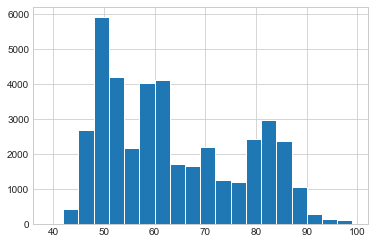

In [51]:
plt.hist(X_train[:,6],bins=20)

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

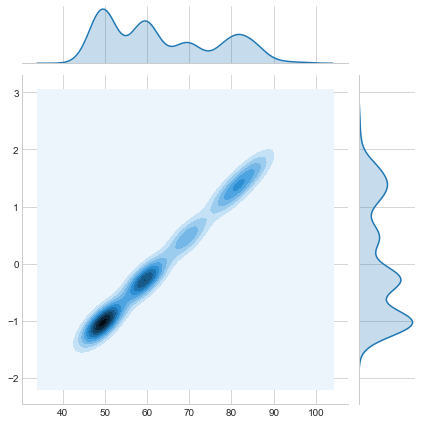

In [53]:
sns.jointplot(X_train[:,6],X_train_sc[:,6],kind='kde')

In [54]:
print("Train:",X_train_sc.shape,"Test:=",y_train.shape)

Train: (41106, 20) Test:= (41106,)


## Handing Class Imbalance

In [55]:
#!pip install imblearn

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
sm = SMOTE()

In [58]:
X_train_res, y_train_res = sm.fit_sample(X_train_sc, y_train.ravel())

In [59]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3514
Before OverSampling, counts of label '0': 37592 

After OverSampling, counts of label '1': 37592
After OverSampling, counts of label '0': 37592


In [60]:
X_test_res, y_test_res = sm.fit_sample(X_test_sc, y_test.ravel())

In [61]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_test_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_res==0)))

Before OverSampling, counts of label '1': 1154
Before OverSampling, counts of label '0': 12548 

After OverSampling, counts of label '1': 12548
After OverSampling, counts of label '0': 12548


## Base Model Creation

### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [63]:
lr.fit(X_train_res,y_train_res)

C:\Users\sachin.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
y_pred_lr=lr.predict(X_test_res)

In [65]:
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)

In [66]:
def append_metrix(y_test,y_pred,model_name):
    models.append(model_name)
    acc.append(accuracy_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
    print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
    print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
    print("Precision Score:\n",precision_score(y_test,y_pred))
    print("Recall score: \n",recall_score(y_test,y_pred))
    print("F1 score: \n",f1_score(y_test,y_pred))


In [67]:
append_metrix(y_test_res,y_pred_lr,"Logistic Regression")

confusion Metrix :
 [[ 9637  2911]
 [ 2221 10327]]
Accuracy Score :
 0.795505259802
Precision Score:
 0.780102734552
Recall score: 
 0.822999681224
F1 score: 
 0.80097727449


In [68]:
models

['Logistic Regression']

## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [70]:
dt.fit(X_train_res,y_train_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
y_pred_dt=dt.predict(X_test_res)

In [72]:
append_metrix(y_test_res,y_pred_dt,"Decision Tree")

confusion Metrix :
 [[11807   741]
 [ 1420 11128]]
Accuracy Score :
 0.913890659866
Precision Score:
 0.937568455641
Recall score: 
 0.886834555308
F1 score: 
 0.911496088791


## SVM

In [73]:
from sklearn.svm import SVC
svc=SVC()

In [74]:
svc.fit(X_train_res,y_train_res)

C:\Users\sachin.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [75]:
y_pred_svc=svc.predict(X_test_res)

In [76]:
append_metrix(y_test_res,y_pred_svc,"SVM")

confusion Metrix :
 [[ 9089  3459]
 [ 1006 11542]]
Accuracy Score :
 0.82208320051
Precision Score:
 0.769415372309
Recall score: 
 0.919827861014
F1 score: 
 0.837925151548


## Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [78]:
rf.fit(X_train_res,y_train_res)

C:\Users\sachin.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
y_pred_rf=rf.predict(X_test_res)

In [80]:
append_metrix(y_test_res,y_pred_rf,"Random Forest")

confusion Metrix :
 [[12091   457]
 [ 2344 10204]]
Accuracy Score :
 0.888388587823
Precision Score:
 0.95713347716
Recall score: 
 0.813197322282
F1 score: 
 0.879314059201


## Adaboost Classifier

In [81]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()

In [82]:
adb.fit(X_train_res,y_train_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [83]:
y_pred_adb=adb.predict(X_test_res)

In [84]:
append_metrix(y_test_res,y_pred_adb,"Ada Boost")

confusion Metrix :
 [[10162  2386]
 [ 1818 10730]]
Accuracy Score :
 0.832483264265
Precision Score:
 0.818084781946
Recall score: 
 0.855116353204
F1 score: 
 0.836190773067


## Gradient Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()

In [86]:
gbc.fit(X_train_res,y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [87]:
y_pred_gbc=gbc.predict(X_test_res)

In [88]:
append_metrix(y_test_res,y_pred_gbc,"Gradient Boosting")

confusion Metrix :
 [[10841  1707]
 [  735 11813]]
Accuracy Score :
 0.90269365636
Precision Score:
 0.87374260355
Recall score: 
 0.941424928275
F1 score: 
 0.906321927267


## Gaussian Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [90]:
gnb.fit(X_train_res, y_train_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [91]:
y_pred_gnb=gnb.predict(X_test_res)

In [92]:
append_metrix(y_test_res,y_pred_gnb,"Gaussian Naive Bayes")

confusion Metrix :
 [[9432 3116]
 [4682 7866]]
Accuracy Score :
 0.689273190947
Precision Score:
 0.716262975779
Recall score: 
 0.626872808416
F1 score: 
 0.668593285168


## KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [94]:
knn.fit(X_train_res,y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [95]:
y_pred_knn=knn.predict(X_test_res)

In [96]:
append_metrix(y_test_res,y_pred_knn,"KNN")

confusion Metrix :
 [[10598  1950]
 [ 4703  7845]]
Accuracy Score :
 0.734897991712
Precision Score:
 0.800918836141
Recall score: 
 0.625199234938
F1 score: 
 0.702233361679


## Light_GBM

In [97]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train_res, label=y_train_res)

In [98]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [99]:
lgb = lgb.train(params,train_set=d_train)

In [100]:
#Prediction
y_pred_lgb=lgb.predict(X_test_res)
#convert into binary values
for i in range(0,len(y_pred_lgb)):
    if y_pred_lgb[i]>=.5:       # setting threshold to .5
        y_pred_lgb[i]=1
    else:  
        y_pred_lgb[i]=0

In [101]:
append_metrix(y_test_res,y_pred_lgb,"LightGBM")

confusion Metrix :
 [[ 8800  3748]
 [  801 11747]]
Accuracy Score :
 0.818736053554
Precision Score:
 0.758115521136
Recall score: 
 0.936165125916
F1 score: 
 0.837784830439


## Best Model Ranking

In [102]:
model_dict = {'Models': models,
             'Accuracies': acc,
             'Precision': precision,
             'Recall': recall,
             'f1-score': f1}
model_dict

{'Models': ['Logistic Regression',
  'Decision Tree',
  'SVM',
  'Random Forest',
  'Ada Boost',
  'Gradient Boosting',
  'Gaussian Naive Bayes',
  'KNN',
  'LightGBM'],
 'Accuracies': [0.79550525980235898,
  0.91389065986611417,
  0.82208320051004147,
  0.88838858782276064,
  0.83248326426522157,
  0.90269365635957921,
  0.68927319094676442,
  0.73489799171182657,
  0.81873605355435131],
 'Precision': [0.78010273455204715,
  0.93756845564074476,
  0.76941537230851276,
  0.95713347715974106,
  0.81808478194571521,
  0.87374260355029587,
  0.7162629757785467,
  0.80091883614088821,
  0.75811552113585023],
 'Recall': [0.8229996812240995,
  0.88683455530761879,
  0.91982786101370739,
  0.81319732228243546,
  0.85511635320369783,
  0.94142492827542235,
  0.62687280841568382,
  0.62519923493783869,
  0.93616512591648071],
 'f1-score': [0.80097727449003342,
  0.91149608879059663,
  0.83792515154815073,
  0.879314059201172,
  0.83619077306733169,
  0.90632192726714744,
  0.66859328516787075,


In [103]:
model_df=pd.DataFrame(model_dict)
model_df

,Models,Accuracies,Precision,Recall,f1-score
0,Logistic Regression,0.795505,0.780103,0.823000,0.800977
1,Decision Tree,0.913891,0.937568,0.886835,0.911496
2,SVM,0.822083,0.769415,0.919828,0.837925
3,Random Forest,0.888389,0.957133,0.813197,0.879314
4,Ada Boost,0.832483,0.818085,0.855116,0.836191
5,Gradient Boosting,0.902694,0.873743,0.941425,0.906322
6,Gaussian Naive Bayes,0.689273,0.716263,0.626873,0.668593
7,KNN,0.734898,0.800919,0.625199,0.702233
8,LightGBM,0.818736,0.758116,0.936165,0.837785


In [104]:
model_df.sort_values(['Accuracies','f1-score','Recall','Precision'],ascending=False)

,Models,Accuracies,Precision,Recall,f1-score
1,Decision Tree,0.913891,0.937568,0.886835,0.911496
5,Gradient Boosting,0.902694,0.873743,0.941425,0.906322
3,Random Forest,0.888389,0.957133,0.813197,0.879314
4,Ada Boost,0.832483,0.818085,0.855116,0.836191
2,SVM,0.822083,0.769415,0.919828,0.837925
8,LightGBM,0.818736,0.758116,0.936165,0.837785
0,Logistic Regression,0.795505,0.780103,0.823000,0.800977
7,KNN,0.734898,0.800919,0.625199,0.702233
6,Gaussian Naive Bayes,0.689273,0.716263,0.626873,0.668593
